In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-null  float64
 22

In [5]:
#check the missing values column-wise
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
Target    0
dtype: int64

In [6]:
#check the number of duplicate rows
data.duplicated().sum()

675

In [7]:
data[data.duplicated()]  #to check the duplicate rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
1181,2.010213,0.063667,-1.620606,0.341472,0.368741,-0.586677,0.034489,-0.043750,0.303938,-0.201902,...,-0.301625,-0.820824,0.362729,0.595190,-0.345739,0.150098,-0.066713,-0.040558,1.79,0
1936,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,-1.022946,...,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00,0
2530,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,-0.075186,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.00,0
2878,1.076018,-0.126284,1.320255,1.154681,-0.892714,0.356662,-0.792107,0.396302,0.630048,0.007419,...,0.071098,0.320206,0.055667,0.204490,0.230282,-0.396762,0.077135,0.024214,1.00,0
3301,1.109985,0.368032,-0.061407,1.376844,0.070437,-1.100573,0.610397,-0.487201,0.920589,-0.380884,...,-0.088583,-0.126343,-0.217999,0.358122,0.814626,-0.345815,-0.048111,0.020956,89.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56809,1.886717,-0.517305,-1.351317,-0.141112,0.586967,1.052636,-0.330743,0.353181,0.936002,-0.165864,...,-0.071110,0.074763,0.201228,-1.628444,-0.245710,0.023253,0.014937,-0.081462,20.00,0
56830,1.284143,0.462738,-0.371277,0.825644,0.464456,-0.466731,0.459673,-0.186236,-0.549594,0.204381,...,0.013440,0.084371,-0.246710,-0.325573,0.927623,-0.272459,-0.009998,-0.005489,0.89,0
56865,1.018412,1.036663,-1.689814,1.315476,1.698436,0.528807,0.331715,0.364539,-0.711798,-1.570288,...,-0.040238,0.096172,-0.092549,-1.345664,0.510305,-0.182674,0.107058,0.071818,0.89,0
56893,2.060160,0.018599,-1.072853,0.381576,0.018414,-1.063353,0.240911,-0.365617,0.382032,0.033555,...,-0.275957,-0.600087,0.325765,-0.054364,-0.267467,0.201880,-0.060525,-0.058989,1.29,0


In [8]:
data.drop_duplicates(inplace = True)  #delete the duplicate rows permanently from the dataframe

In [9]:
data.shape

(56287, 30)

In [10]:
#to check the data imbalance
data['Target'].value_counts()

Target
0    56189
1       98
Name: count, dtype: int64

In [11]:
56189 / 56287

0.9982589230195249

In [12]:
98 / 56287

0.0017410769804750653

Things to do when we have imbalanced data:

    Oversampling (SMOTE Technique)
    Undersampling(Loss of Data)
    Use Tree Based Algorithms only (Decision Tree, Random Forest, XGBoost, Adaboost, GradientBoost).


In [13]:
X = data.drop(columns = 'Target')
y = data['Target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 10)

The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset. It means if there are 60% 'yes' class data and 40% 'no' class data in the full dataset, then in train and test data split this proportion should be maintained.

** Note:** We don't need to scale/standardize the data when using tree based algorithms. Also we don't have to remove outliers when using tree based algorithm because they are not affected by them.

## Apply Random Forest Classifier to the Data

In [15]:
rf_classifier = RandomForestClassifier(n_estimators = 80, max_depth = 4, criterion = 'entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=80)

n_estimator is the number of trees and ideally the value of this paramater should not be less than 100 and max_depth helps us control the length of each tree in Random Forest

In [17]:
y_pred = rf_classifier.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
print(y_test)

28106    0
35003    0
30703    0
52126    0
10346    0
        ..
41295    0
2599     0
13820    0
1323     0
52787    0
Name: Target, Length: 11258, dtype: int64


In [20]:
accuracy_score(y_pred, y_test)

0.9991117427607035

**Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score and confusion matrix**

In [21]:
roc_auc_score(y_pred, y_test)

0.9282156832850538

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
precision_score(y_pred, y_test)

0.6

In [24]:
recall_score(y_pred, y_test)

0.8571428571428571



    0 - No fraud (Negative)
    1 - fraud happened (Positive)





    Precision: Appropriate when minimizing false positives is the focus.
    Recall: Appropriate when minimizing false negatives is the focus.





    normal data - Accuracy score, rocaucscore, confusion matrix(precision score, recall score)
    imbalanced data - rocaucscore, confusion matrix(precision score, recall score)



Plot the variable importance

In [26]:
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

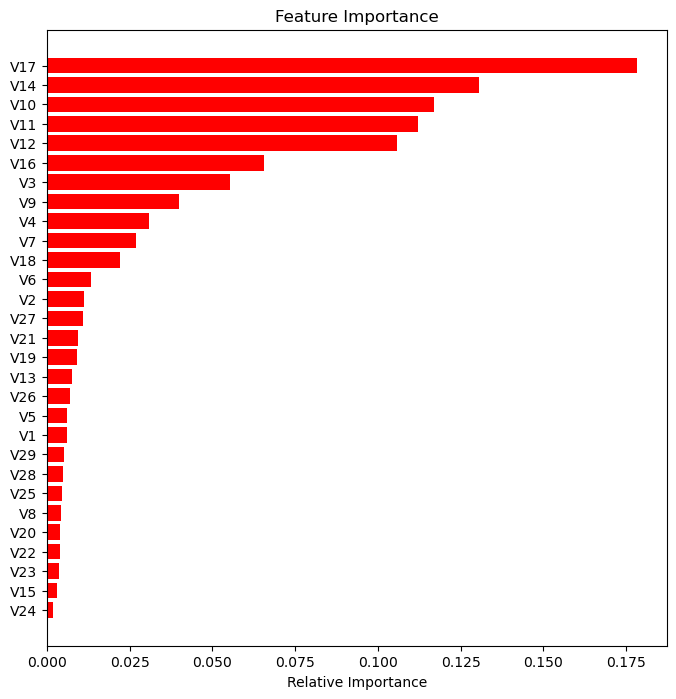

In [27]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()